In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from datetime import datetime
import statsmodels.api as sm
from pandas.plotting import lag_plot
from pmdarima.arima import auto_arima
import warnings
warnings.filterwarnings("ignore")
import pmdarima as pm

In [2]:
#!pip install pmdarima

In [3]:
name_data = "M0003_2554_NON"

In [4]:
data = pd.read_csv(name_data+".csv",parse_dates=['nav_date'])
#1.M0017_2565_SSF.csv
#2.M0110_2564_SSF.csv
#3.M0005_2558_SSF.csv
#4.M0120_2564_SSF.csv
#5.M0134_2564_SSF.csv
#6.M0144_2563_SSF.csv
# 7.M0151_2563_SSF.csv
#M0152_2564_SSF.csv

In [5]:
data

,nav_date,net_asset,last_val,sell_price,buy_price,sell_swap_price,buy_swap_price
0,2011-01-25,6.472791e+08,9.9799,0.0,0.0000,0.0,0.0
1,2011-01-26,6.463207e+08,9.9650,0.0,0.0000,0.0,0.0
2,2011-01-27,6.467661e+08,9.9719,0.0,0.0000,0.0,0.0
3,2011-01-28,6.463207e+08,9.9650,0.0,0.0000,0.0,0.0
4,2011-01-31,6.458210e+08,9.9573,0.0,0.0000,0.0,0.0
...,...,...,...,...,...,...,...
724,2014-01-14,6.598177e+08,11.0188,0.0,0.0000,0.0,0.0
725,2014-01-15,6.598599e+08,11.0195,0.0,0.0000,0.0,0.0
726,2014-01-16,6.598883e+08,11.0200,0.0,0.0000,0.0,0.0
727,2014-01-17,6.599166e+08,11.0204,0.0,0.0000,0.0,0.0


In [6]:
data.isnull().sum()

nav_date           0
net_asset          0
last_val           0
sell_price         0
buy_price          0
sell_swap_price    0
buy_swap_price     0
dtype: int64

In [7]:
data['nav_date'] = pd.to_datetime(data['nav_date'])

In [8]:
monthly_avg = data.set_index('nav_date').resample('M').mean()

In [9]:
df = pd.DataFrame(monthly_avg["last_val"])

In [10]:
df.isnull().sum()

last_val    0
dtype: int64

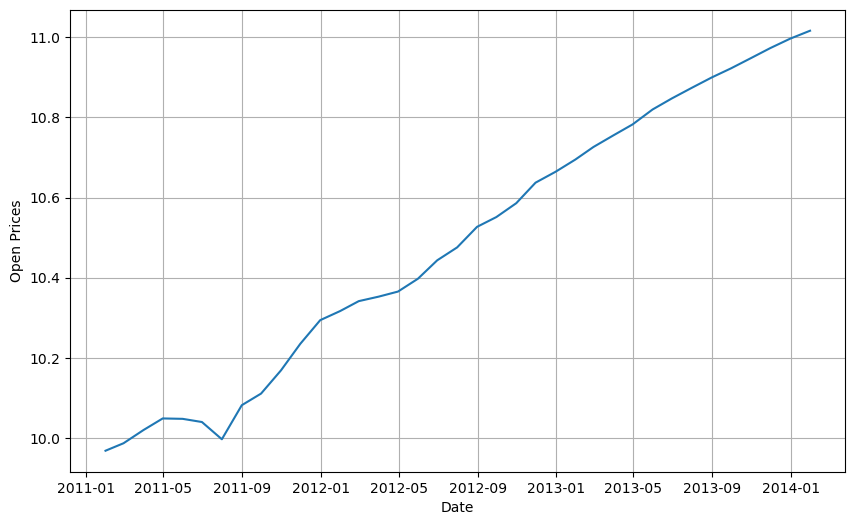

In [11]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Open Prices')
plt.plot(df)

plt.show()

In [12]:
df = df.dropna()

In [13]:
df.shape

(37, 1)

In [14]:
train_size1 = 5 #ถอยไปจนถึง forloop 60 40 เก็บ rmse graph growth rate #for original parameter
train_size = int(len(df)*0.60)
test_size = int(len(df)-train_size)

In [15]:
train_size

22

In [16]:
test_size

15

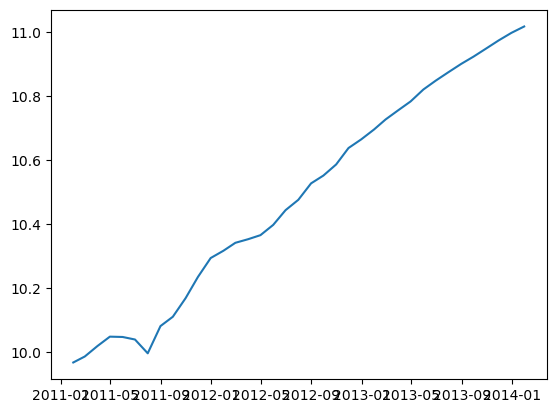

In [17]:
train_data = df.iloc[:train_size]
train_data1 = df.iloc[:-train_size1]
test_data = df.iloc[train_size:]
plt.plot(df)

In [18]:
print(len(train_data))
print(len(test_data))
print(len(train_data1))

22
15
32


In [19]:
df.shape

(37, 1)

In [20]:
#df = df.reshape(-1,1)

In [21]:
df.shape

(37, 1)

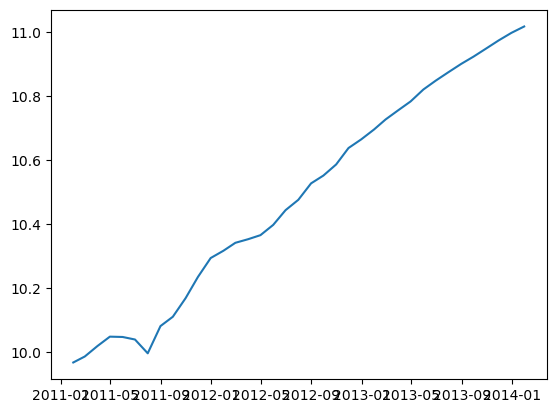

In [27]:
scaler = MinMaxScaler(feature_range = (0,1))
df_scaled = scaler.fit_transform(df)
train_scaled = df_scaled[:train_size]
train_scaled1 = df_scaled[:-train_size1]
test_scaled = df_scaled[train_size:]
plt.plot(df)
#train_scaled = scaler.fit_transform(train_data)
#train_scaled1 = scaler.fit_transform(train_data1) #for original parameter
#test_scaled = scaler.transform(test_data)


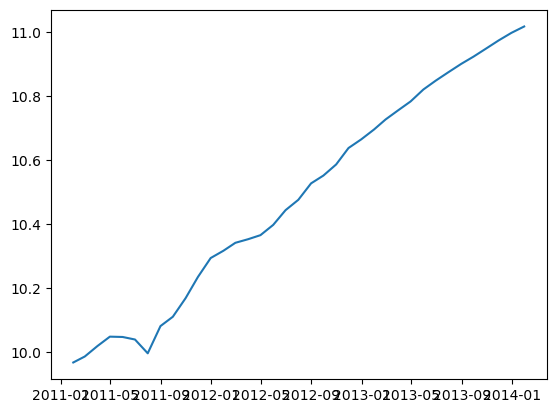

In [28]:
plt.plot(df, label='Train Data')

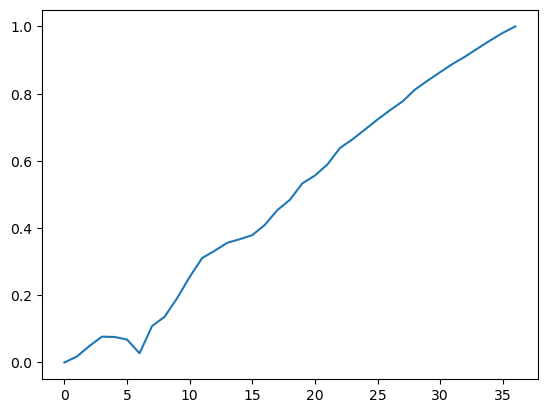

In [29]:
plt.plot(df_scaled, label='Train Data')

In [30]:
train_scaled

array([[0.        ],
       [0.01777467],
       [0.04915374],
       [0.07686474],
       [0.07589952],
       [0.06833411],
       [0.02726133],
       [0.10836285],
       [0.13606306],
       [0.19137113],
       [0.25451503],
       [0.31085352],
       [0.33254508],
       [0.35617761],
       [0.36688613],
       [0.37894156],
       [0.40949767],
       [0.45334355],
       [0.4840886 ],
       [0.53305433],
       [0.55633195],
       [0.58938406]])

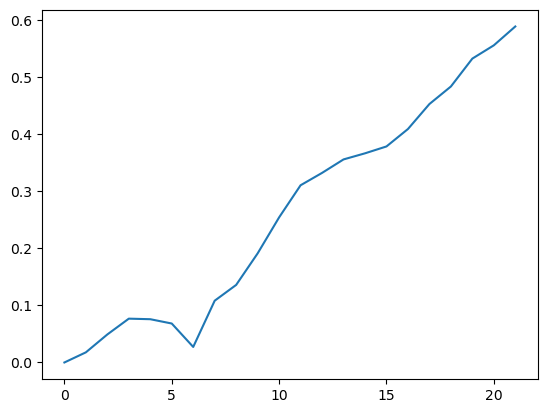

In [31]:
plt.plot(train_scaled)

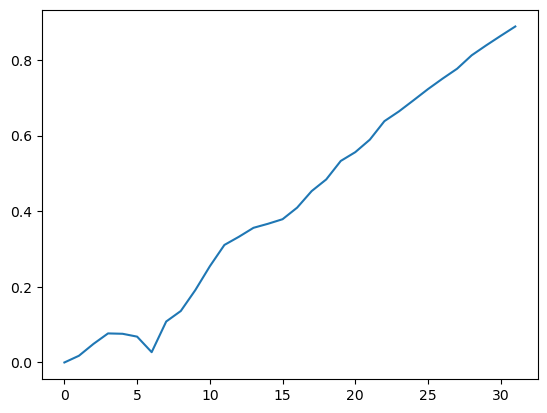

In [32]:
plt.plot(train_scaled1)

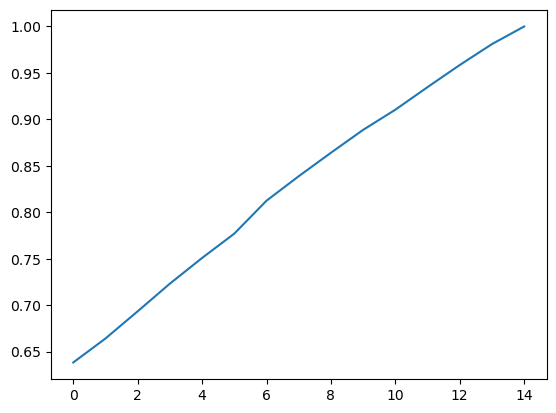

In [33]:
plt.plot(test_scaled)

In [34]:
auto_arima = pm.auto_arima(train_scaled, stepwise=False, seasonal=True)
auto_arima

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [35]:
auto_arima = pm.auto_arima(train_scaled1, stepwise=False, seasonal=True)
auto_arima

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [36]:
from statsmodels.tsa.arima.model import ARIMA

In [37]:
p = 0
d= 1
q = 0

In [38]:
model = ARIMA(train_scaled, order=(p, d, q))

In [39]:
results = model.fit()

In [40]:
#train_data2 = train_scaled

In [41]:
test_size

15

In [42]:
n_periods = []
test_size1 = test_size//5
# ทำการหาร test_size เป็น 10 ช่วง โดยเพิ่มขึ้นทีละ 5
for i in range(1, 6):
    period = i * test_size1  # เพิ่มขึ้นทีละ 5
    n_periods.append(period)  # เก็บช่วงที่ได้ใน n_periods
n_periods[4] = test_size

In [43]:
n_periods

[3, 6, 9, 12, 15]

In [44]:
rsme_list = []

25
[0.69337037 0.69337037 0.69337037]


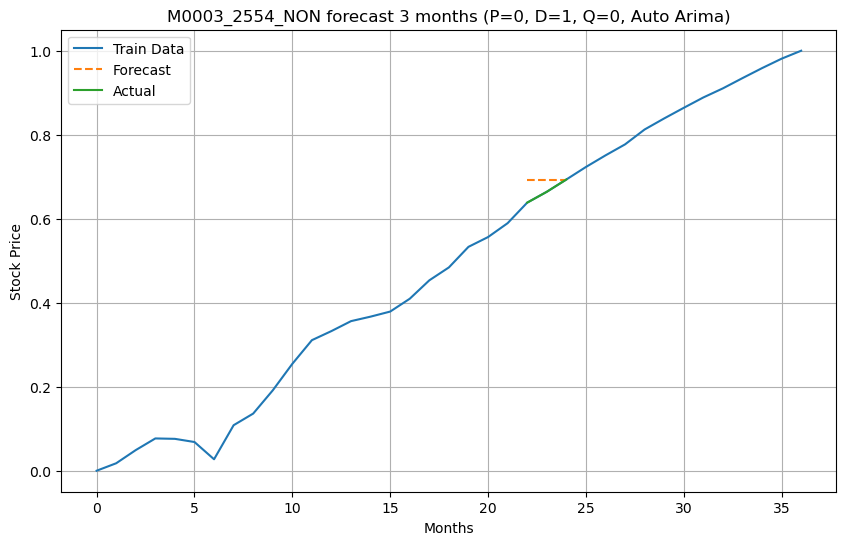

28
[0.776993 0.776993 0.776993 0.776993 0.776993 0.776993]


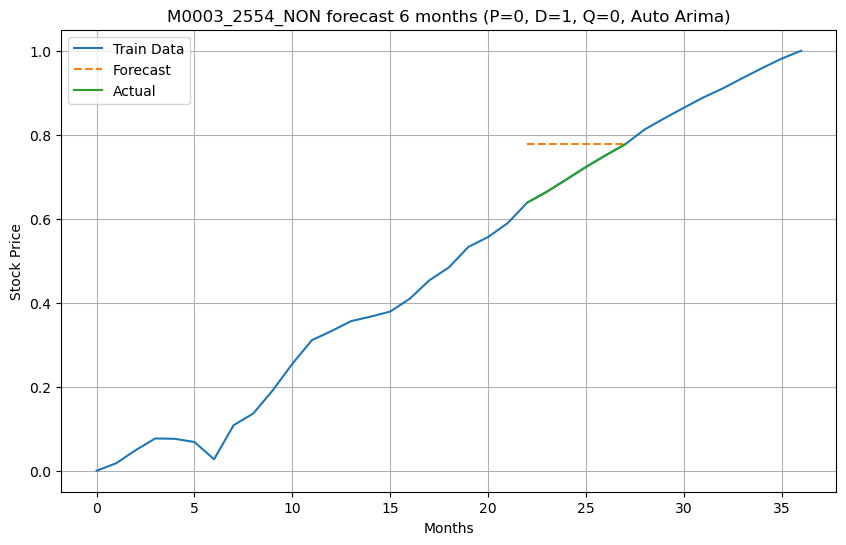

31
[0.86403354 0.86403354 0.86403354 0.86403354 0.86403354 0.86403354
 0.86403354 0.86403354 0.86403354]


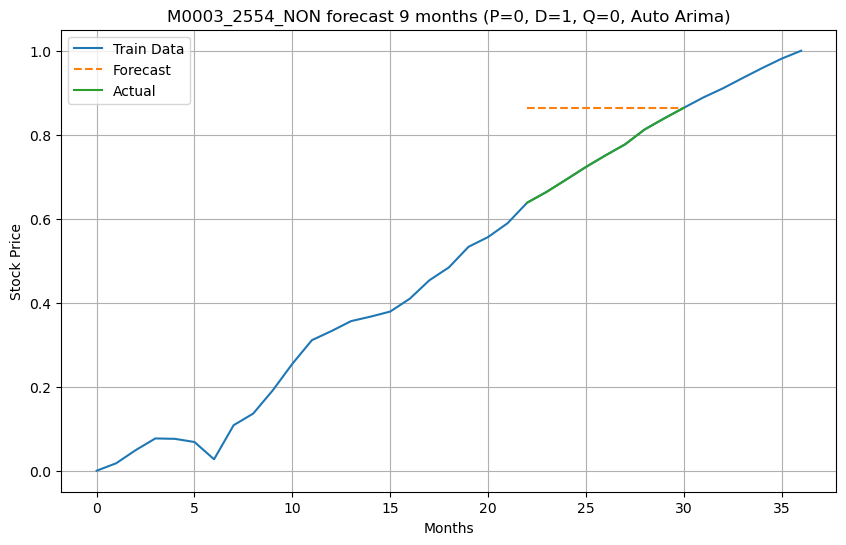

34
[0.93473496 0.93473496 0.93473496 0.93473496 0.93473496 0.93473496
 0.93473496 0.93473496 0.93473496 0.93473496 0.93473496 0.93473496]


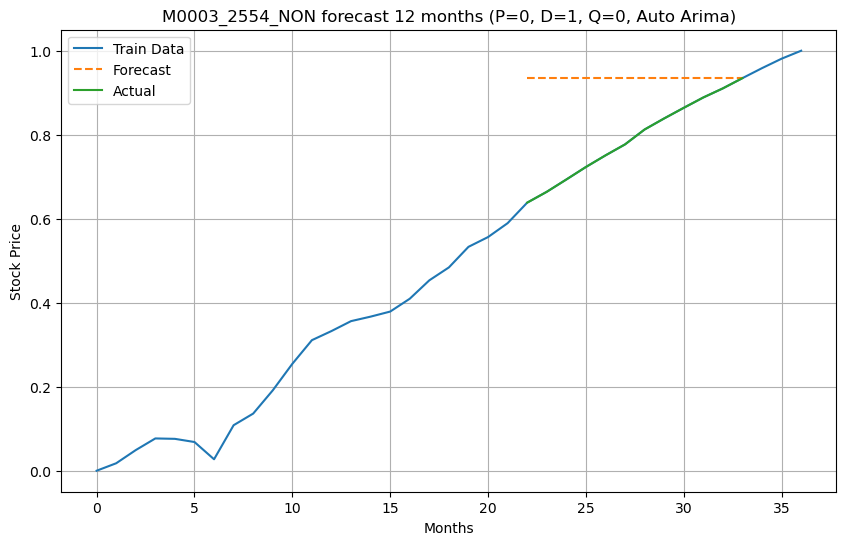

37
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


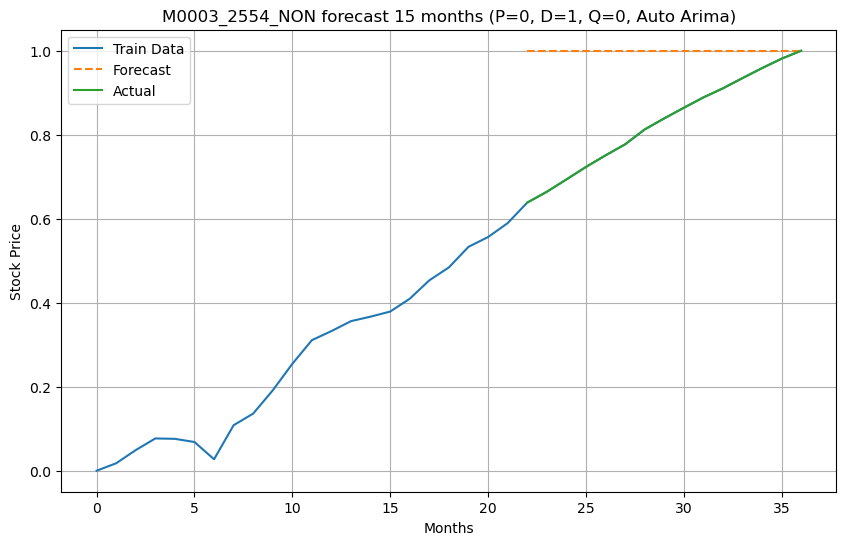

In [51]:
rsme_list = []
for period in n_periods:
    i=0
    train_data_values = train_scaled
    true_values = test_scaled[:period]
    train_data_values = np.concatenate([train_scaled, true_values])
    print(len(train_data_values))
    model = ARIMA(train_data_values, order=(p, d, q))
    results = model.fit()
    forecast = results.forecast(steps=period)
    print(forecast)
    rsme = mean_squared_error(true_values, forecast)
    rsme_list.append(rsme)

    # Append data from test_data to train_data
    i=i+period
    plt.figure(figsize=(10, 6))
    plt.plot(df_scaled, label='Train Data')

    plt.plot(range(len(train_data_values)-i, len(train_data_values)), forecast, label='Forecast', linestyle='dashed')
    plt.plot(range(len(train_data_values)-i, len(train_data_values)), true_values, label="Actual")
    plt.xlabel('Months')
    plt.ylabel('Stock Price')
    plt.title(name_data + " forecast " + str(period) + " months (P=" + str(p) + ", D=" + str(d) + ", Q=" + str(q) + ", Auto Arima)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [46]:
train_data_values

array([[0.        ],
       [0.01777467],
       [0.04915374],
       [0.07686474],
       [0.07589952],
       [0.06833411],
       [0.02726133],
       [0.10836285],
       [0.13606306],
       [0.19137113],
       [0.25451503],
       [0.31085352],
       [0.33254508],
       [0.35617761],
       [0.36688613],
       [0.37894156],
       [0.40949767],
       [0.45334355],
       [0.4840886 ],
       [0.53305433],
       [0.55633195],
       [0.58938406],
       [0.63825607],
       [0.66407925],
       [0.69337037],
       [0.72314495],
       [0.750776  ],
       [0.776993  ],
       [0.81243996],
       [0.83878474],
       [0.86403354],
       [0.8887006 ],
       [0.9103774 ],
       [0.93473496],
       [0.95853393],
       [0.98103635],
       [1.        ]])

In [47]:
print(rsme_list)

[0.0012985188244737955, 0.007096190252008837, 0.018181714530973055, 0.029564876198687955, 0.042175396898080544]
